In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
np.random.seed(1234)
import sys
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, roc_curve, precision_score, recall_score
import sklearn.feature_selection as skf
import sklearn.model_selection as skm
import matplotlib.pyplot as plt
from scipy import stats
import time
import os
import timeit
from google.colab import files

In [191]:
## mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Classes
Build for logistic classifier: We implement our models as python classes. Two class methods that we usually need to implement are fit and predict; which respectively perform training by fitting the data, and making prediction on new data. In the __init__ function, we initialize our model, usually this includes an assignment to hyper-parameters.

sigmoid_function(): this function would calculate the sigmoid parameter, which would be used further in fit function.

In [192]:
class LogisticRegression():
    
    def __init__(self, w, lr):
        self.w = w
        self.lr = lr
        
    def sigmoid_function(self,x):
        return  (1 / (1 + np.exp(-x)))       
    
    def cost_function(self,w, x, y):
        m = len(y)
        a = np.dot(x,w)
        y_pred = self.sigmoid_function(a)
        error = y*np.log(y_pred) + (1-y)*np.log(1-y_pred)
        cross_entropy  = -(1/m) * sum(error)               
        gradient = (1/m)*(np.dot(x.transpose(), (y_pred-y)))
    
        return cross_entropy, gradient

    def grad_descent(self,x, y, w_in, lr):
        entropies = []
        gradient = np.inf
        w_error = np.inf  ######Test (for creating table 3 in the report)
        n = 0
        while np.linalg.norm(gradient) > 10**-2:
        # while w_error > 10**-8: ######Test
          cross_entropy, gradient = self.cost_function(w_in, x, y)
          w_in -= lr * gradient
          # w_update = w_in - lr * gradient ######Test
          # w_error = (np.linalg.norm(w_in - w_update))**2  ######Test
          # w_in = w_update ######Test
          entropies.append(cross_entropy)
          n += 1
    
        return w_in, entropies, n

    def fit(self, x, y):
        rows = x.shape[0]
        column = x.shape[1]
        optimized_weight, entropies, n = self.grad_descent(x, y, self.w, self.lr)
        
        return optimized_weight, entropies, n
    
    def predict(self,w,x):
        result = x.dot(w)
        y_pred = self.sigmoid_function(result)
        y_pred_cls = [1 if i > 0.5 else 0 for i in result]
        y_pred_cls = np.array(y_pred_cls)
        p = y_pred_cls.reshape(len(x),1)
        
        return p  

Definig functions for calculating accuracy, correlation matrix, error, 10-fold cross section, and other perfomance metrics.

In [193]:
class CustomMethods():
    def __init__():
            pass

    def Accu_eval(y_actual, y_pred):
        accuracy = np.sum(y_actual==y_pred) / len(y_actual) * 100
    
        return accuracy
    
    def conf_matrix(y_actual,y_predicted):
        y_predicted = np.array(y_predicted, dtype="int64")
        y_actual = np.array(y_actual, dtype="int64")
        tp, fp, tn, fn = 0, 0, 0, 0
        for i in range (len(y_actual)-1):
            if ((y_actual[i,0] == 1) & (y_predicted[i,0] == 1)):
                tp += 1        
            elif((y_actual[i,0] == 0) & (y_predicted[i,0] == 0)):
                tn += 1        
            elif((y_actual[i,0] == 0) & (y_predicted[i,0] == 1)):
                fp += 1       
            elif((y_actual[i,0] == 1) & (y_predicted[i,0] == 0)):
                fn +=1
                
            matrix = np.array([[tp, fp], [fn, tn]])
    
        return matrix, tp, tn, fp, fn
    
    def error(x,y):
        acc = Accu_eval(x,y)
        error = (1-(acc/100))*100
    
        return error

    def recall(y_actual,y_predicted):
        matrix, tp, tn, fp, fn = conf_matrix(y_actual,y_predicted)
        recall_v = tp / (tP+fn)
    
        return recall_v

    def specificity(y_actual,y_predicted):
        matrix, tp, tn, fp, fn = conf_matrix(y_actual,y_predicted)
        specificity_v = tn / fp+tn
    
        return specificity_v

    def precision(y_actual,y_predicted):
        matrix, tp, tn, fp, fn = conf_matrix(y_actual,y_predicted)
        precision_v = tp / (fp+tp)
    
        return precision_v    
    
    def z_score(x):
        mean_score = np.mean(x, axis=0)
        std_score = np.std(x, axis=0)
        x = (x-mean_score)/std_score
        
        return x
    
    def Kfold_cross(x_in,y_in,w):
        start = timeit.default_timer()
        dimension=x_in.shape
        N = dimension[0]
        M = dimension[1]
        accuracy = np.zeros((10, 1))
        for i in range(10):
            l = random_ind[(N//10 * i): (N//10 * (i + 1))]
            Y_validation = y_in[l]
            X_validation = x_in[l,:]
            Y_training = np.delete(y_in, random_ind[N//10 * i: N//10 * (i + 1)], 0)  #The value 0 at the end is the axis used for rows
            X_training = np.delete(x_in, random_ind[N//10 * i: N//10 * (i + 1)], 0)
            if i == 9:
                Y_validation = y_in[random_ind[N//10 * i: ]] #The total rows of the whole dataset is not a multiplication of 10; therefore, the validation sets are not of equal size
                X_validation = x_in[random_ind[N//10 * i: ], :]    
                Y_training = np.delete(y_in, random_ind[N//10 * i: ], 0)
                X_training = np.delete(x_in, random_ind[N//10 * i: ], 0)     
            regressor = LogisticRegression(w, lr=0.01)
            o_w , o_cost, n = regressor.fit(X_training, Y_training)
            p = regressor.predict(o_w,X_validation)
            accuracy[i] = CustomMethods.Accu_eval(Y_validation, p)
            print(accuracy[i], 'Accuracy for fold', i + 1)
            print((100-accuracy[i]), 'Error for fold', i + 1)
        stop = timeit.default_timer()
        print('Time: ', stop - start)     
        return o_w, o_cost, accuracy, n
    
    def initialization(x,y):
        rows = x.shape[0]
        column = x.shape[1]
        x_mod = np.append(np.ones((rows,1)), x, axis=1)
        y_mod = y.reshape(rows, 1)
        w_initial = np.zeros((column+1, 1))
    
        return x_mod, y_mod, w_initial

    def correlation(dataset, thresold):
      col_corr = set()
      corr_matrix = dataset.corr()
      for i in range(len(corr_matrix.columns)):
          for j in range (i):
              if abs(corr_matrix.iloc[i,j]) > thresold:
                  colname = corr_matrix.columns[i]
                  col_corr.add(colname)
      return col_corr

    def split(x_in,y_in):
      rows=x_in.shape[0]
      N_validation=rows//5;            # total number of data for validation
      N_training=rows-N_validation;    # total number of data for training
      X_training = x_in[random_ind[0:N_training], :]
      Y_training = y_in[random_ind[0:N_training], :]
      X_validation = np.delete(x_in, random_ind[0:N_training], 0)
      Y_validation = np.delete(y_in, random_ind[0:N_training], 0)

      print("shape of train data:")
      print(X_training.shape, Y_training.shape)
      print("shape of validation data:")
      print(X_validation.shape, Y_validation.shape)
    
      return X_training, X_validation, Y_training, Y_validation

# Load your data

In [194]:
Bankrupcy_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bankrupcy.csv')

# Data visualization

In [ ]:
sns.set(style="white")
corr = Bankrupcy_csv.corr()
f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
y = Bankrupcy_csv["ClassLabel"].values
x = Bankrupcy_csv.drop(columns=["ClassLabel"]).values
class1 = (y==1).reshape(len(y),1) 
class0 = (y==0).reshape(len(y),1)
a = x[class1[:,0], 50]
b = x[class1[:,0], 1]
c = x[class0[:,0], 50]
d = x[class0[:,0], 1]
plt.figure(figsize=(12,12))
plt.scatter(a, b, marker='X', color='green', s=90)
plt.scatter(c, d, marker='^', color='red', s=90)
plt.xlabel('Attribute51')
plt.ylabel('Attribute2')
plt.title('Data distribution for attribute 51 and attribute 1 over class 0 and 1')
plt.legend(['Class 1', 'Classs 0'])
plt.show()

In [ ]:
(data['ClassLabel']).value_counts().plot(kind ='pie', autopct='%1.2f%%')
plt.show();

# Model 1
Using raw data without any data standarization

In [198]:
Bankrupcy_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bankrupcy.csv')
y = Bankrupcy_csv["ClassLabel"].values
x = Bankrupcy_csv.drop(columns=["ClassLabel"]).values
rows=x.shape[0]

In [206]:
# create random indices
random_ind = np.random.choice(len(y), size = rows, replace = False)
save = random_ind

In [207]:
x, y, w_initial=CustomMethods.initialization(x,y)
train_X, test_X, train_y, test_y=CustomMethods.split(x,y)
print("shape of train data:")
print(train_X.shape, train_y.shape)
print("shape of test data:")
print(test_X.shape, test_y.shape)

shape of train data:
(363, 66) (363, 1)
shape of validation data:
(90, 66) (90, 1)
shape of train data:
(363, 66) (363, 1)
shape of test data:
(90, 66) (90, 1)


In [201]:
regressor = LogisticRegression(w_initial, lr=0.01)
o_w, o_c, n = regressor.fit(train_X,train_y)
y_pred_train = regressor.predict(o_w, train_X)
y_pred_test = regressor.predict(o_w, test_X)

In [208]:
train_acc = CustomMethods.Accu_eval(train_y, y_pred_train)
test_acc = CustomMethods.Accu_eval(test_y,y_pred_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 58.1267217630854
Test Accuracy: 66.66666666666666


In [ ]:
## 10-fold cross validation!

dimension = x.shape
N = dimension[0]
random_ind = np.random.choice(len(y), size = N, replace = False)
w,c,a,n = CustomMethods.Kfold_cross(x,y,w_initial)
print("Average Accuracy", np.mean(a))
print("Average error", np.mean(100-a))

In [ ]:
recall_score(test_y, y_pred_test), precision_score(test_y, y_pred_test) 

# Model 2
Using pearson correlation cofficient to remove higly correlated features from the data set. as we have high number of features hence setting the thershold for filtering the features to 0.9 (90% correlated)

In [210]:
Bankrupcy_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bankrupcy.csv')
data = Bankrupcy_csv
data_array = data.values
rows = x.shape[0]
column = x.shape[1]
y = data["ClassLabel"].values
x = data.drop(columns=["ClassLabel"])
x, y, w_initial=CustomMethods.initialization(x,y)

In [211]:
train_X, test_X, train_Y, test_Y = CustomMethods.split(x,y)

shape of train data:
(363, 65) (363, 1)
shape of validation data:
(90, 65) (90, 1)


We used person correlation matrix to identify mutually correlated features.Here we can see there are 29 features which are highly correlated with other features in the dataset, hence we can remove them.

In [212]:
thresold=0.927
col_corr = set()
corr_matrix = data.corr()
for i in range(len(corr_matrix.columns)):
  for j in range (i):
    if abs(corr_matrix.iloc[i,j]) > thresold:
      colname = corr_matrix.columns[i]
      col_corr.add(colname)

In [213]:
dropfeat=col_corr
len(set(dropfeat))

29

 list of higly correlated cofficient (positive and negative) which can be removed

In [ ]:
dropfeat

In [ ]:
Y = y
X = data.drop(dropfeat, axis=1)
X = X.drop(columns='ClassLabel').values
print(y.shape)
print(X.shape)
X_in, Y_in, w_initial = CustomMethods.initialization(X,Y)

In [ ]:
## 10-fold cross validation
dimension = x.shape
N = dimension[0]
random_ind = np.random.choice(len(y), size = N, replace = False)
o_w,o_c,a,n = CustomMethods.Kfold_cross(X_in,Y_in,w_initial)
print("Average Accuracy", np.mean(a))
print("Average error", np.mean(100-a))

In [ ]:
confusion_matrix(test_y, y_pred_test)

In [ ]:
train_X, test_X, train_Y, test_Y = CustomMethods.split(X_in,Y_in)
regressor = LogisticRegression(w_initial, lr=0.01)
o_w, o_c, n = regressor.fit(train_X,train_Y)
y_pred_train = regressor.predict(o_w, train_X)
y_pred_test = regressor.predict(o_w, test_X)
train_acc = CustomMethods.Accu_eval(train_Y, y_pred_train)
test_acc = CustomMethods.Accu_eval(test_Y,y_pred_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

In [ ]:
plt.plot(o_c)
plt.xlabel('Iterations')
plt.ylabel('Entropy')
plt.title('Value of cost over iterations')

In [222]:
fpr, tpr, thershold = roc_curve(test_Y, y_pred_test)


In [ ]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")

In [225]:
recall_score(test_Y, y_pred_test), precision_score(test_Y,y_pred_test)

(0.6666666666666666, 0.7741935483870968)

# Model 3
Same as model 2 + expanding the features to 2nd order polynomial: squares of positive and negative correlated features (positive correlated attributes: atr2, atr51 & negative attributes: atr25, atr35, atr7, atr16, atr38) + atr2*atr51

In [226]:
Bankrupcy_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bankrupcy.csv')

sqr_atr2 = (Bankrupcy_csv['attribute2'])**2
sqr_atr51 = (Bankrupcy_csv['attribute51'])**2
sqr_atr25 = (Bankrupcy_csv['attribute25'])**2
sqr_atr35 = (Bankrupcy_csv['attribute35'])**2
sqr_atr7 = (Bankrupcy_csv['attribute7'])**2
sqr_atr16 = (Bankrupcy_csv['attribute16'])**2
sqr_atr38 = (Bankrupcy_csv['attribute38'])**2
mul_atr2_51 = (Bankrupcy_csv['attribute2'] * Bankrupcy_csv['attribute51'])


In [227]:
Bankrupcy_csv['sqr_atr2'] = sqr_atr2
Bankrupcy_csv['sqr_atr51'] = sqr_atr51
Bankrupcy_csv['sqr_atr25'] = sqr_atr25
Bankrupcy_csv['sqr_atr35'] = sqr_atr35
Bankrupcy_csv['sqr_atr7'] = sqr_atr7
Bankrupcy_csv['sqr_atr16'] = sqr_atr16
Bankrupcy_csv['sqr_atr38'] = sqr_atr38
Bankrupcy_csv['mul_atr2_51'] = mul_atr2_51



In [ ]:
Y = Bankrupcy_csv["ClassLabel"].values
x = Bankrupcy_csv.drop(columns=['ClassLabel'])
X = x.drop(dropfeat, axis=1).values
print(Y.shape)
print(X.shape)

In [229]:
X_in, Y_in, w_initial = CustomMethods.initialization(X,Y)

In [ ]:
## 10-fold cross validation

o_w,o_c,a,n = CustomMethods.Kfold_cross(X_in,Y_in,w_initial)
print("Average Accuracy", np.mean(a))
print("Average error", np.mean(100-a))

In [ ]:
train_X, test_X, train_y, test_y = CustomMethods.split(X_in,Y_in)
print("shape of train data:")
print(train_X.shape, train_y.shape)
print("shape of test data:")
print(test_X.shape, test_y.shape)

In [232]:
regressor = LogisticRegression(w_initial, lr=0.01)
o_w, o_c, n = regressor.fit(train_X,train_y)
y_pred_train = regressor.predict(o_w, train_X)
y_pred_test = regressor.predict(o_w, test_X)

In [233]:
train_acc = CustomMethods.Accu_eval(train_y, y_pred_train)
test_acc = CustomMethods.Accu_eval(test_y,y_pred_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 77.13498622589532
Test Accuracy: 75.55555555555556


In [234]:
recall_score(test_Y, y_pred_test), precision_score(test_Y,y_pred_test)


(0.6388888888888888, 0.71875)

In [ ]:
plt.plot(o_c)
plt.xlabel('Iterations')
plt.ylabel('Entropy')
plt.title('Value of cost over iterations')

In [ ]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")

# Model 4 
Same as model 3 + outlier removal

In [238]:
Bankrupcy_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bankrupcy.csv')
data = Bankrupcy_csv
data.shape

(453, 65)

In [239]:
sqr_atr2 = (data['attribute2'])**2
sqr_atr51 = (data['attribute51'])**2
sqr_atr25 = (data['attribute25'])**2
sqr_atr35 = (data['attribute35'])**2
sqr_atr7 = (data['attribute7'])**2
sqr_atr16 = (data['attribute16'])**2
sqr_atr38 = (data['attribute38'])**2
mul_atr2_51 = (data['attribute2'] * data['attribute51'])



In [240]:
data['sqr_atr2'] = sqr_atr2
data['sqr_atr51'] = sqr_atr51
data['sqr_atr25'] = sqr_atr25
data['sqr_atr35'] = sqr_atr35
data['sqr_atr7'] = sqr_atr7
data['sqr_atr16'] = sqr_atr16
data['sqr_atr38'] = sqr_atr38
data['mul_atr2_51'] = mul_atr2_51


In [241]:
data_post_feat = data.drop(dropfeat, axis=1)
data_post_feat.shape

(453, 44)

Range calculation for removing outliers

In [242]:
mean = np.mean(np.mean(data_post_feat))
std = np.std(np.std(data_post_feat))


In [243]:
mean, std

(0.03946923176344824, 0.8529677387510027)

In [244]:
maxi =  mean + std*4
mini = mean - std*4
maxi, mini

(3.4513401867674594, -3.3724017232405625)

In [245]:
z = np.abs(stats.zscore(data))

In [249]:
data_o = data_post_feat[(z<3.5).all(axis=1)]

In [250]:
data_o.shape

(361, 44)

In [251]:
Y = data_o["ClassLabel"].values
X = data_o.drop(columns=['ClassLabel']).values

In [252]:
X.shape
rows=X.shape[0]

In [253]:
Y.shape

(361,)

In [254]:
X_in, Y_in, w_initial = CustomMethods.initialization(X,Y)

In [255]:
# create random indices
random_ind = np.random.choice(len(Y), size = rows, replace = False)
save = random_ind

In [ ]:
## 10-fold cross validation

o_w,o_c,a,n = CustomMethods.Kfold_cross(X_in,Y_in,w_initial)
print("Average Accuracy", np.mean(a))
print("Average error", np.mean(100-a))

In [257]:
train_X, test_X, train_y, test_y = CustomMethods.split(X_in, Y_in)
print("shape of train data:")
print(train_X.shape, train_y.shape)
print("shape of test data:")
print(test_X.shape, test_y.shape)

shape of train data:
(289, 44) (289, 1)
shape of validation data:
(72, 44) (72, 1)
shape of train data:
(289, 44) (289, 1)
shape of test data:
(72, 44) (72, 1)


In [258]:
regressor = LogisticRegression(w_initial, lr=0.01)
o_w, o_c, n = regressor.fit(train_X,train_y)
y_pred_train = regressor.predict(o_w, train_X)
y_pred_test = regressor.predict(o_w, test_X)

In [ ]:
train_acc = CustomMethods.Accu_eval(train_y, y_pred_train)
test_acc = CustomMethods.Accu_eval(test_y,y_pred_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

In [ ]:
recall_score(test_y, y_pred_test), precision_score(test_y,y_pred_test)


In [ ]:
fpr, tpr, thershold = roc_curve(test_y, y_pred_test)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")

In [ ]:
plt.plot(o_c)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Value of cost over iterations')

# Model 5 
Outlier removal + feature expansion

In [264]:
Bankrupcy_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bankrupcy.csv')
data = Bankrupcy_csv
data.shape

(453, 65)

In [265]:
sqr_atr2 = (data['attribute2'])**2
sqr_atr51 = (data['attribute51'])**2
sqr_atr25 = (data['attribute25'])**2
sqr_atr35 = (data['attribute35'])**2
sqr_atr7 = (data['attribute7'])**2
sqr_atr16 = (data['attribute16'])**2
sqr_atr38 = (data['attribute38'])**2
mul_atr2_51 = (data['attribute2'] * data['attribute51'])

data['sqr_atr2'] = sqr_atr2
data['sqr_atr51'] = sqr_atr51
data['sqr_atr25'] = sqr_atr25
data['sqr_atr35'] = sqr_atr35
data['sqr_atr7'] = sqr_atr7
data['sqr_atr16'] = sqr_atr16
data['sqr_atr38'] = sqr_atr38
data['mul_atr2_51'] = mul_atr2_51

data.shape

(453, 73)

In [266]:
mean = np.mean(np.mean(data))
std = np.std(np.std(data))
mean, std

(0.010375838528804929, 0.7355059625499816)

In [267]:
maxi =  mean + std*4
mini = mean - std*4
maxi, mini

(2.952399688728731, -2.9316480116711214)

In [268]:
print(data.shape)
z = np.abs(stats.zscore(data))
data_o = data[(z<2.9).all(axis=1)]

(453, 73)


In [269]:
Y = data_o["ClassLabel"].values
X = data_o.drop(columns=['ClassLabel']).values
X.shape

(339, 72)

In [270]:
X_in, Y_in, w_initial = CustomMethods.initialization(X,Y)
rows=X_in.shape[0]
X_in.shape

(339, 73)

In [271]:
# create random indices
random_ind = np.random.choice(len(Y_in), size = rows, replace = False)
save = random_ind

In [ ]:
o_w,o_c,a,n = CustomMethods.Kfold_cross(X_in,Y_in,w_initial)
print("Average Accuracy", np.mean(a))
print("Average error", np.mean(100-a))

In [ ]:
train_X, test_X, train_y, test_y = CustomMethods.split(X_in, Y_in)
print("shape of train data:")
print(train_X.shape, train_y.shape)
print("shape of test data:")
print(test_X.shape, test_y.shape)

In [274]:
regressor = LogisticRegression(w_initial, lr=0.01)
o_w, o_c, n = regressor.fit(train_X,train_y)
y_pred_train = regressor.predict(o_w, train_X)
y_pred_test = regressor.predict(o_w, test_X)

In [ ]:
train_acc = CustomMethods.Accu_eval(train_y, y_pred_train)
test_acc = CustomMethods.Accu_eval(test_y,y_pred_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 82.73092369477911
Test Accuracy: 79.03225806451613


In [ ]:
recall_score(test_y, y_pred_test), precision_score(test_y,y_pred_test)

In [ ]:
fpr, tpr, thershold = roc_curve(test_y, y_pred_test)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")

In [ ]:
plt.plot(o_c)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Value of cost over iterations')

Plot cross-entropy as a function of number of iterations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

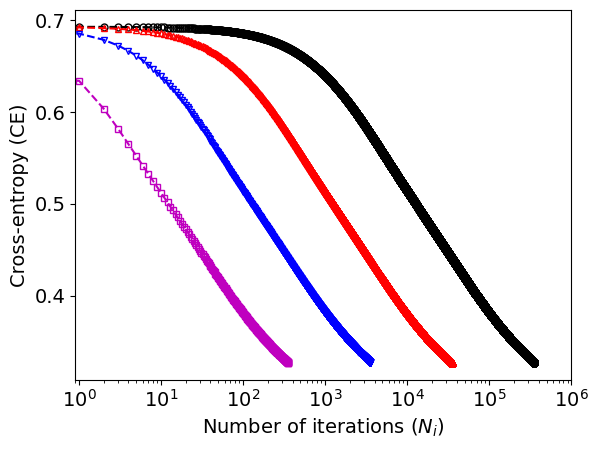

In [ ]:

X_training, X_validation, Y_training, Y_validation = CustomMethods.split(X_in, Y_in)
column = X_in.shape[1]
w = np.zeros((column , 1))
LogFitter1 = LogisticRegression(w, 0.001)
[w_out, entropies_1, n_1] = LogFitter1.fit(X_training,Y_training)
y_predict=LogFitter1.predict(w_out, X_validation)
accuracy = CustomMethods.Accu_eval(Y_validation, y_predict)
n_1 = range(n_1) 


w = np.zeros((column , 1))
LogFitter1 = LogisticRegression(w, 0.01)
[w_out, entropies_2, n_2] = LogFitter1.fit(X_training,Y_training)
y_predict=LogFitter1.predict(w_out, X_validation)
accuracy = CustomMethods.Accu_eval(Y_validation, y_predict)
n_2 = range(n_2) 

print(accuracy)

w = np.zeros((column , 1))
LogFitter1 = LogisticRegression(w, 0.1)
[w_out, entropies_3, n_3] = LogFitter1.fit(X_training,Y_training)
y_predict=LogFitter1.predict(w_out, X_validation)
accuracy = CustomMethods.Accu_eval(Y_validation, y_predict)
n_3 = range(n_3)

w = np.zeros((column , 1))
LogFitter1 = LogisticRegression(w, 1)
[w_out, entropies_4, n_4] = LogFitter1.fit(X_training,Y_training)
y_predict=LogFitter1.predict(w_out, X_validation)
accuracy = CustomMethods.Accu_eval(Y_validation, y_predict)
n_4 = range(n_4)

plt.plot(n_1, entropies_1, 'o--k', markerfacecolor='none', markersize=5)
plt.plot(n_2, entropies_2, '^--r', markerfacecolor='none', markersize=5)
plt.plot(n_3, entropies_3, 'v--b', markerfacecolor='none', markersize=5)
plt.plot(n_4, entropies_4, 's--m', markerfacecolor='none', markersize=5)
plt.xlim(0.9, 1000000)
plt.xscale('log')
# plt.rc('font', size=80)
params = {'axes.labelsize': 10,'axes.titlesize':10, 'legend.fontsize': 10, 'xtick.labelsize': 10, 'ytick.labelsize': 12}
plt.rcParams.update(params)
plt.xlabel('Number of iterations (${N_i}$)')
plt.ylabel('Cross-entropy (CE)')
# plt.rcParams.update(plt.rcParamsDefault)
plt.yticks([0.4, 0.5, 0.6, 0.7])
plt.savefig("Lr_CE_bankruptcy.eps")
files.download("Lr_CE_bankruptcy.eps") 
